# Instructions

1. This assignment is worth 5% of the final grade.
2. Insert cells (code or markdown, as appropriate) below each question and fill in your answers there.
2. You are required to work on this individually. Any form of plagiarism will result in 0.
3. Please submit your notebook file (name it ``IND5003_A1_<Your_Name>.ipynb``) through Canvas before **17th Sep 2023 23:59hrs**.

Contents:  
[Question 1 preprocessing](#Question-1)    
&emsp;&emsp;[Question 1 part 1 EDA](#Question-1-part-1-EDA)  
&emsp;&emsp;[Question 1 part 1 Ans](#Question-1-part-1-Ans)   
&emsp;&emsp;[Question 1 part 2 preprocess](#Question-1-part-2-preprocess)   
&emsp;&emsp;[Question 1 part 2 Ans](#Question-1-part-2-Ans)   
[Question 2](#Question-2)    

# Question 1

The file `resale_flat_prices.csv` contains resale flat prices in Singapore from January 2017 onwards. The file `town_type_region.xlsx` contains the classification of each town as *mature* or *non-mature* and each town's geographical region (*north*, *north-east*, *east*, *west*, or *central*). Use these two files to answer the following questions:

1. In the period January 2022 to June 2022, was the mean resale price **per square metre per year of remaining lease** of 4 ROOM flats the same for all geographical regions?
2. In the period July 2022 to December 2022, was there any difference in the distribution of geographical regions for each resale flat type? (Please **omit** 1 ROOM and MULTI-GENERATION flats from this analysis.)

It is up to you to choose the appropriate hypothesis test, and to perform the five steps for each question.

In [35]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from myscripts import inference
from sklearn import preprocessing
from scipy import stats

In [2]:
# Import the data required
resale_prices_df = pd.read_csv('../data/resale_flat_prices.csv')
town_type_df = pd.read_excel('../data/town_type_region.xlsx')

In [3]:
# Print the first few lines of the data to take a look at it
display(resale_prices_df.head())
display(town_type_df.head())

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


,town,type,region
0,BUKIT BATOK,non-mature,west
1,BUKIT PANJANG,non-mature,west
2,CHOA CHU KANG,non-mature,west
3,HOUGANG,non-mature,north-east
4,JURONG EAST,non-mature,west


In [4]:
# Check what is the size of the data
display(town_type_df.info())
display(resale_prices_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   town    27 non-null     object
 1   type    27 non-null     object
 2   region  27 non-null     object
dtypes: object(3)
memory usage: 780.0+ bytes


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160564 entries, 0 to 160563
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                160564 non-null  object 
 1   town                 160564 non-null  object 
 2   flat_type            160564 non-null  object 
 3   block                160564 non-null  object 
 4   street_name          160564 non-null  object 
 5   storey_range         160564 non-null  object 
 6   floor_area_sqm       160564 non-null  float64
 7   flat_model           160564 non-null  object 
 8   lease_commence_date  160564 non-null  int64  
 9   remaining_lease      160564 non-null  object 
 10  resale_price         160564 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 13.5+ MB


None

The 2 datasets are different in size.  
The resale price dataset have town.  
The town type can be used to map the town type in resale price dataset.     

In [5]:
# Create town mapper dictionary
town_type_mapper_dict={}
for idx, town in enumerate(town_type_df["town"]):
    town_type_mapper_dict[town] = [str(town_type_df.iloc[idx, 1]), str(town_type_df.iloc[idx, 2])]
town_type_mapper_dict

{'BUKIT BATOK': ['non-mature', 'west'],
 'BUKIT PANJANG': ['non-mature', 'west'],
 'CHOA CHU KANG': ['non-mature', 'west'],
 'HOUGANG': ['non-mature', 'north-east'],
 'JURONG EAST': ['non-mature', 'west'],
 'JURONG WEST': ['non-mature', 'west'],
 'PUNGGOL': ['non-mature', 'north-east'],
 'SEMBAWANG': ['non-mature', 'north'],
 'SENGKANG': ['non-mature', 'north-east'],
 'TENGAH': ['non-mature', 'west'],
 'WOODLANDS': ['non-mature', 'north'],
 'YISHUN': ['non-mature', 'north'],
 'ANG MO KIO': ['mature', 'north-east'],
 'BEDOK': ['mature', 'east'],
 'BISHAN': ['mature', 'central'],
 'BUKIT MERAH': ['mature', 'central'],
 'BUKIT TIMAH': ['mature', 'central'],
 'CENTRAL AREA': ['mature', 'central'],
 'CLEMENTI': ['mature', 'west'],
 'GEYLANG': ['mature', 'central'],
 'KALLANG/WHAMPOA': ['mature', 'central'],
 'MARINE PARADE': ['mature', 'central'],
 'PASIR RIS': ['mature', 'east'],
 'QUEENSTOWN': ['mature', 'central'],
 'SERANGOON': ['mature', 'north-east'],
 'TAMPINES': ['mature', 'east'],


In [6]:
# Check what is the resale flat dataset
display(resale_prices_df["town"].unique())
display(len(resale_prices_df["town"].unique()))

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

26

It can be seen that the entry of town is matched.  
A mapper can be used to add column to the resale price df based on the "town" column.  

In [7]:
# Function to map town to type and region
def map_town(row):
    '''This function add type and region to the original df row-wise
    '''
    town = row["town"]
    if town in town_type_mapper_dict:
        row["type"], row["region"] = town_type_mapper_dict[town]
    return row

# Apply the mapping function to the DataFrame
resale_prices_df = resale_prices_df.apply(map_town, axis=1)

resale_prices_df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,type,region
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0,mature,north-east
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0,mature,north-east
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0,mature,north-east
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0,mature,north-east
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0,mature,north-east


In [8]:
# Filter the dates to make a smaller subset
# Create a boolean mask to filter the date range

# Convert filter to datetime format
start_date = pd.to_datetime("2022-01")
end_date = pd.to_datetime("2022-06")
# Conditions
later_than_start = (pd.to_datetime(resale_prices_df['month']) >= start_date)
ealier_than_end = (pd.to_datetime(resale_prices_df['month']) <= end_date)
is_4_rm = (resale_prices_df['flat_type']=='4 ROOM')
# Create mask
mask = (later_than_start & ealier_than_end & is_4_rm)

# Apply the mask to filter the DataFrame
resale_june_df = resale_prices_df[mask].copy(deep=True)
resale_june_df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,type,region
116724,2022-01,ANG MO KIO,4 ROOM,438,ANG MO KIO AVE 10,10 TO 12,92.0,New Generation,1979,56 years 01 month,488000.0,mature,north-east
116725,2022-01,ANG MO KIO,4 ROOM,556,ANG MO KIO AVE 10,13 TO 15,92.0,New Generation,1980,57 years 01 month,452888.0,mature,north-east
116726,2022-01,ANG MO KIO,4 ROOM,419,ANG MO KIO AVE 10,07 TO 09,99.0,New Generation,1979,56 years 08 months,460000.0,mature,north-east
116727,2022-01,ANG MO KIO,4 ROOM,466,ANG MO KIO AVE 10,04 TO 06,93.0,New Generation,1984,61 years 09 months,448000.0,mature,north-east
116728,2022-01,ANG MO KIO,4 ROOM,472,ANG MO KIO AVE 10,01 TO 03,92.0,New Generation,1979,56 years 07 months,419000.0,mature,north-east


In [9]:
# Look at how large the remaining dataset is
resale_june_df.shape

(5587, 13)

### Question 1 part 1 EDA

The dataset is now complete and ready for analysis.  
Time to proceed onto part 1.
* Q1.1. In the period January 2022 to June 2022, was the mean resale price per square metre per year of remaining lease of 4 ROOM flats the same for all geographical regions?   
------
Steps before answeering the question:  
*Step 1*: Find the resale price per square meter per year for the 5587 flats  
*Step 2*: Group these flats by geographical locations  
*Step 3*: Compare the mean of these locations and provide graphical displays   

Step 1.1: Find the remaining lease in years  
There are 3 types of formats in the column.  
xx years xx month  
xx years xx months  
xx years   
Extract the full years, if month or months are available, extract them too.   
Use .split() method on string and then convert the numerical value to float.

In [10]:
# Function to extract years as a float
def extract_years(years_str):
    '''This function extract out the year from years
    and extract out month from month and months if available
    '''
    # Split the string by whitespace
    parts = years_str.split()
    
    # Initialize years and months
    years = 0.0
    months = 0.0
    
    # Convert the first part to years
    if len(parts) >= 2:
        years = float(parts[0])
    
    # Convert the second part to months if it exists
    if len(parts) >= 4:
        months = float(parts[2])
    
    # Calculate the total years including fractional years for months
    total_years = years + (months / 12.0)
    
    return total_years

# Apply the function to the "years_left" column
resale_june_df["years_left"] = resale_june_df["remaining_lease"].apply(extract_years)

# Display the DataFrame with the calculated "years_left_numeric" column
resale_june_df.head()


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,type,region,years_left
116724,2022-01,ANG MO KIO,4 ROOM,438,ANG MO KIO AVE 10,10 TO 12,92.0,New Generation,1979,56 years 01 month,488000.0,mature,north-east,56.083333
116725,2022-01,ANG MO KIO,4 ROOM,556,ANG MO KIO AVE 10,13 TO 15,92.0,New Generation,1980,57 years 01 month,452888.0,mature,north-east,57.083333
116726,2022-01,ANG MO KIO,4 ROOM,419,ANG MO KIO AVE 10,07 TO 09,99.0,New Generation,1979,56 years 08 months,460000.0,mature,north-east,56.666667
116727,2022-01,ANG MO KIO,4 ROOM,466,ANG MO KIO AVE 10,04 TO 06,93.0,New Generation,1984,61 years 09 months,448000.0,mature,north-east,61.750000
116728,2022-01,ANG MO KIO,4 ROOM,472,ANG MO KIO AVE 10,01 TO 03,92.0,New Generation,1979,56 years 07 months,419000.0,mature,north-east,56.583333


In [11]:
# Define a function
def price_per_sqm_per_yr_left(row):
    '''This function calculte the resale price 
    per square meter per year of lease left for a row
    '''
    row["price_p_sqm_p_yr"] = row["resale_price"] / row["floor_area_sqm"] / row["years_left"]
    return row
# Apply the mapping function to the DataFrame
resale_june_df = resale_june_df.apply(price_per_sqm_per_yr_left, axis=1)

In [12]:
# Examine the result
resale_june_df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,type,region,years_left,price_p_sqm_p_yr
116724,2022-01,ANG MO KIO,4 ROOM,438,ANG MO KIO AVE 10,10 TO 12,92.0,New Generation,1979,56 years 01 month,488000.0,mature,north-east,56.083333,94.579753
116725,2022-01,ANG MO KIO,4 ROOM,556,ANG MO KIO AVE 10,13 TO 15,92.0,New Generation,1980,57 years 01 month,452888.0,mature,north-east,57.083333,86.237004
116726,2022-01,ANG MO KIO,4 ROOM,419,ANG MO KIO AVE 10,07 TO 09,99.0,New Generation,1979,56 years 08 months,460000.0,mature,north-east,56.666667,81.996435
116727,2022-01,ANG MO KIO,4 ROOM,466,ANG MO KIO AVE 10,04 TO 06,93.0,New Generation,1984,61 years 09 months,448000.0,mature,north-east,61.750000,78.011406
116728,2022-01,ANG MO KIO,4 ROOM,472,ANG MO KIO AVE 10,01 TO 03,92.0,New Generation,1979,56 years 07 months,419000.0,mature,north-east,56.583333,80.489210


In [13]:
region_mean = resale_june_df.groupby("region").mean(numeric_only=True)
region_mean

,floor_area_sqm,lease_commence_date,resale_price,years_left,price_p_sqm_p_yr
region,,,,,
central,92.835616,1998.524462,697475.331585,75.827870,99.374415
east,97.951253,1992.440111,512002.892758,69.791783,75.905445
north,94.680214,2000.610695,460684.142118,77.902228,63.376665
north-east,93.463863,2005.951422,527832.780806,83.261898,68.809559
west,96.255719,2000.812092,499709.852778,78.141408,67.380671


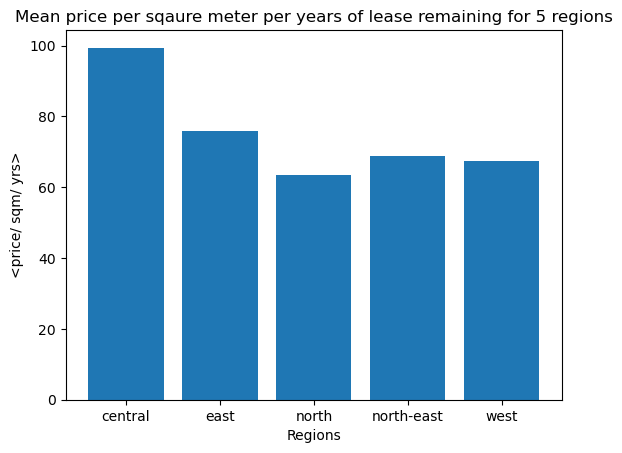

In [14]:
plt.bar(x=region_mean.index, height=region_mean['price_p_sqm_p_yr'])
plt.title("Mean price per sqaure meter per years of lease remaining for 5 regions")
plt.xlabel("Regions")
plt.ylabel("<price/ sqm/ yrs>")
plt.show()

From the above table, we can clearly see that the price per sqm per year remaining is different for different regions.  
The central region is the most expensive, and the price difference is large, having a $25 gap with the next expensive region, east.  
The north region is the least expensive, but is similar in price as compared to three other regions, west and north-west.  

### Question 1 part 1 Ans

*Step 1*: Check assumptions.   
The assumptions of ANOVA test are:
  * The observations from each group are from a Normal distribution.
  * The variance within each group is the same.
  * The data are independent (within each group and between the groups).  


In [15]:
resale_june_df.groupby('region')['price_p_sqm_p_yr'].describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
central,1022.0,99.374415,13.420201,62.385464,90.631526,99.488348,107.086370,183.912069
east,718.0,75.905445,9.357089,51.822465,68.294110,75.556600,82.518468,99.856836
north,935.0,63.376665,7.083446,45.970488,58.365059,61.678299,67.574205,94.311644
north-east,1688.0,68.809559,11.443648,49.220861,61.114442,64.937410,73.640070,123.575811
west,1224.0,67.380671,11.923527,48.427425,59.175366,64.128898,71.770518,127.877238


<Axes: xlabel='region', ylabel='price_p_sqm_p_yr'>

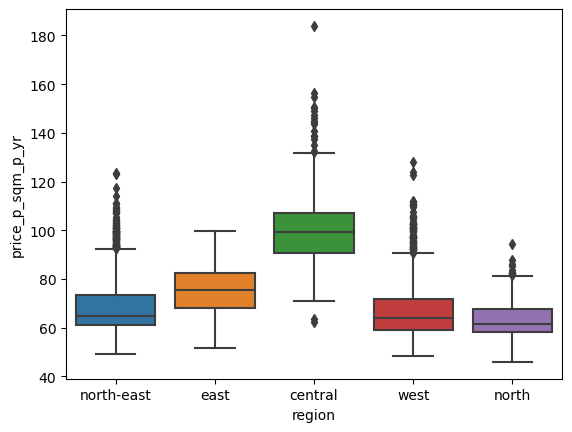

In [16]:
sns.boxplot(data=resale_june_df, x='region', y='price_p_sqm_p_yr')

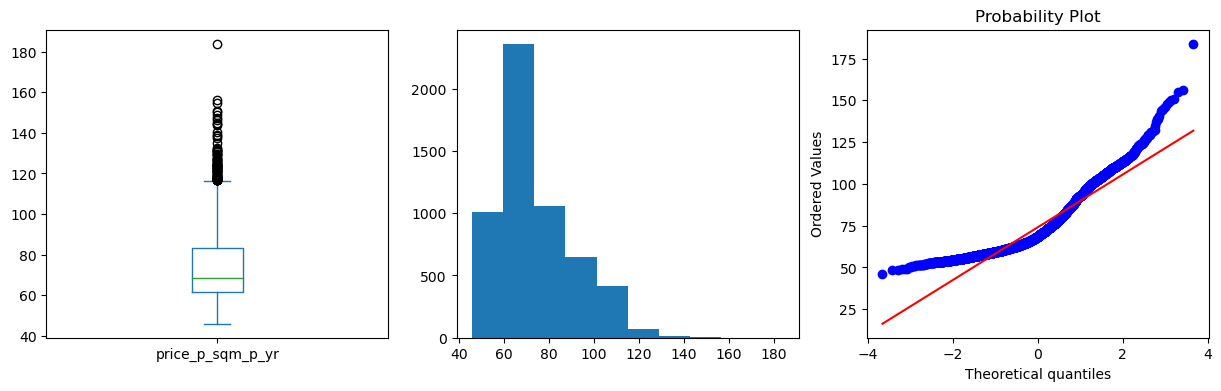

In [17]:
# See the data set to see if they are of the same group
inference.check_normality(resale_june_df['price_p_sqm_p_yr'])

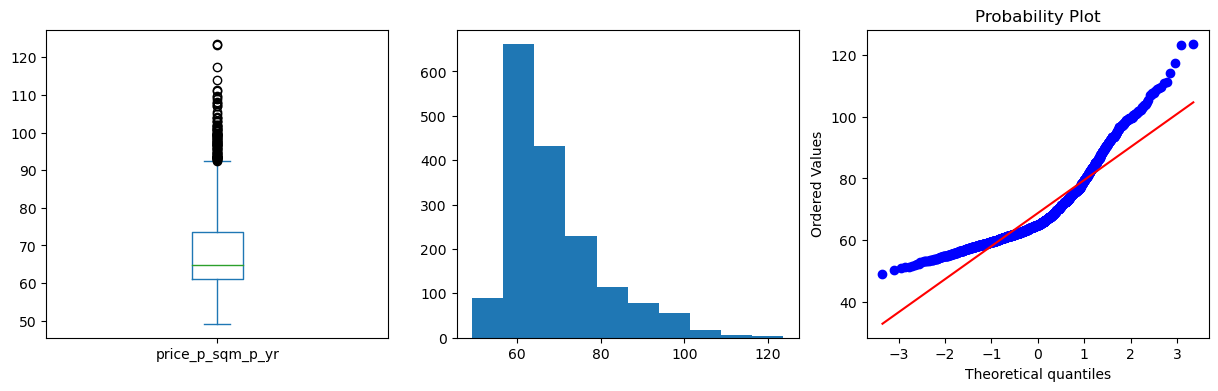

In [18]:
# Check the north-east region
inference.check_normality(resale_june_df.loc[resale_june_df['region']=='north-east', 'price_p_sqm_p_yr'])

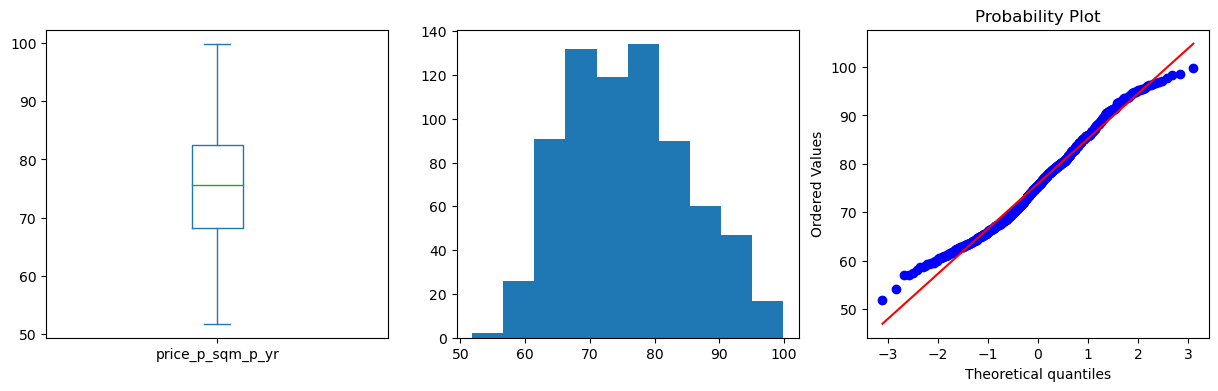

In [19]:
# Check the east region
inference.check_normality(resale_june_df.loc[resale_june_df['region']=='east', 'price_p_sqm_p_yr'])

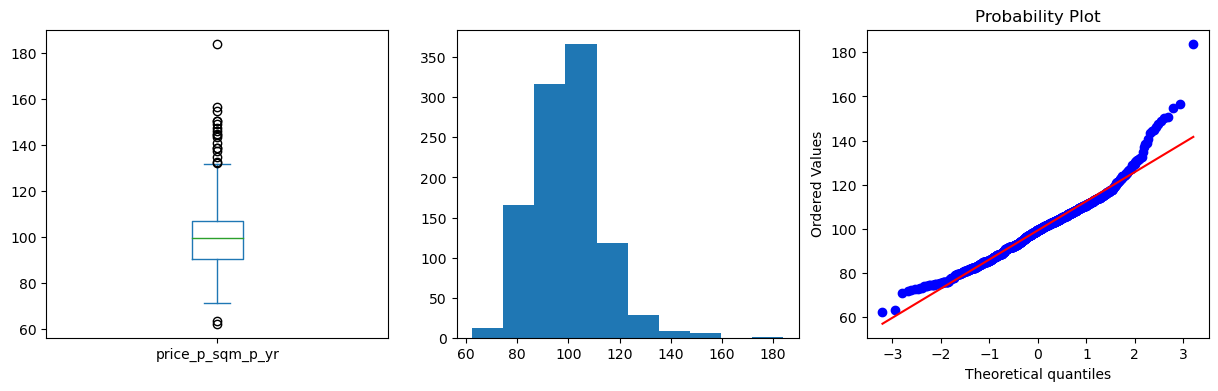

In [20]:
# Check the central region
inference.check_normality(resale_june_df.loc[resale_june_df['region']=='central', 'price_p_sqm_p_yr'])

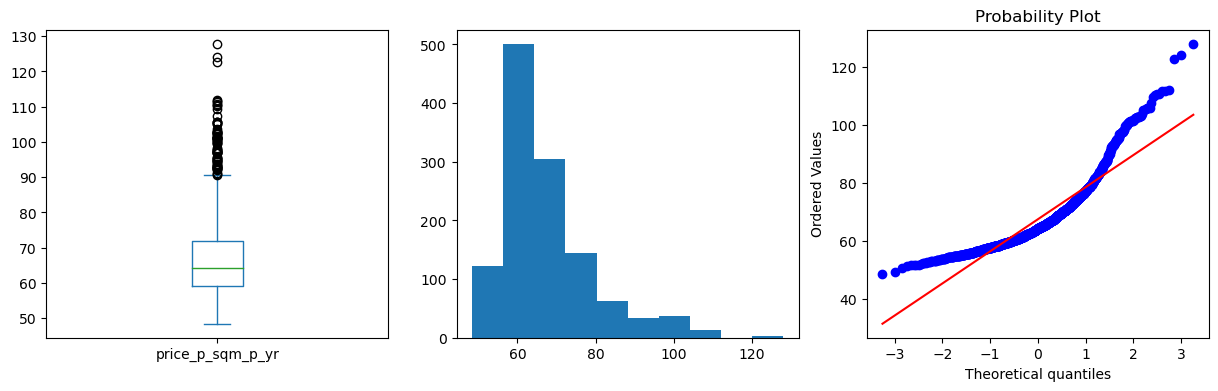

In [21]:
# Check the westregion
inference.check_normality(resale_june_df.loc[resale_june_df['region']=='west', 'price_p_sqm_p_yr'])

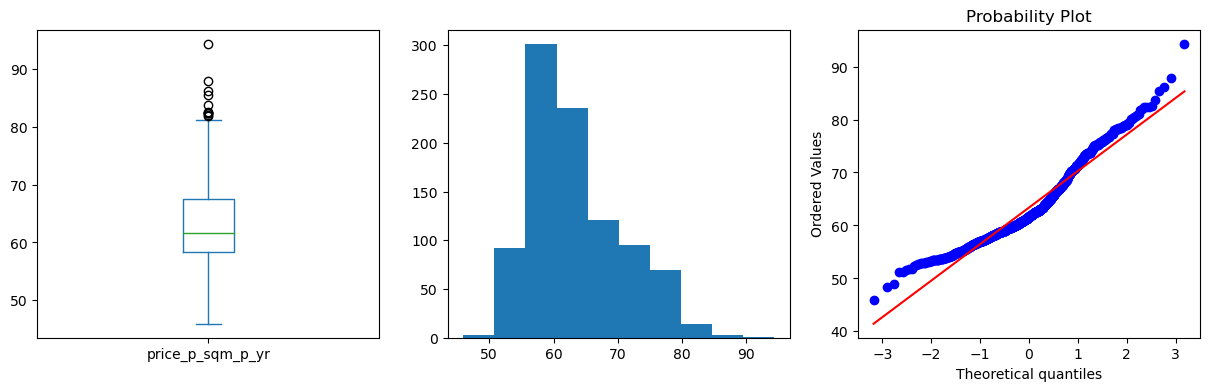

In [22]:
# Check the north region
inference.check_normality(resale_june_df.loc[resale_june_df['region']=='north', 'price_p_sqm_p_yr'])

The source which the 5 samples come from does not have a normal distribution.   
The 5 samples here does not have a normal distribution.  
This means that ANOVA test can not be used.  
This mean there is a need to use a statistics test that doesn't assume noramlity.  
In this case, use *Kruskal-Wallis* test.  
The following are the assumptions on *Kruskal-Wallis* test:
* Samples are random samples. `Checked`
* The samples are independent. `Checked`
* The measurement scale is ordinal, and the variable is continuous. `Checked`
* There are no distributional assumptions. `Checked`

*Step2*: Write the hypotyhesis   
* H0: All regions have the same `mean resale price per sqm per lease remaining`   
* H1: At least 1 region's `mean resale price per sqm per lease remaining` is different from the other regions  

This is a 2 tailed test.  
The null hypothesis will be rejected at a significance level (alpha) of 0.05.

*Step 3 & 4*: Compute test statistics and the p value of Kruskal-Wallis test  

In [23]:
# Use scipy.stat
kw_res = stats.kruskal(resale_june_df.loc[resale_june_df['region']=='north-east', 'price_p_sqm_p_yr'],
                       resale_june_df.loc[resale_june_df['region']=='east', 'price_p_sqm_p_yr'],
                       resale_june_df.loc[resale_june_df['region']=='central', 'price_p_sqm_p_yr'],
                       resale_june_df.loc[resale_june_df['region']=='west', 'price_p_sqm_p_yr'],
                       resale_june_df.loc[resale_june_df['region']=='north', 'price_p_sqm_p_yr'])

In [24]:
print(f'The test statistic value is {kw_res[0]:.3f}.')
print(f'The corresponding p-value is {kw_res[1]:.3f}.')

The test statistic value is 2582.618.
The corresponding p-value is 0.000.


*Step 5*: Draw conclusion from p value.  
We would conclude that we have strong evidence against the null hypothesis and that the `mean resale price per sqm per lease remaining` for all regions are the same.  
This is becasue the p value is an extremely small number, much lesser than the treshold alpha of p = 0.005 for the inherently 2 tailed *Kruskal-Wallis* test.

-------

#### Question 1 part 2 preprocess

Time to proceed on to part 2  
* Q1.2 In the period July 2022 to December 2022, was there any difference in the distribution of geographical regions for each resale flat type? (Please omit 1 ROOM and MULTI-GENERATION flats from this analysis.)
----
Steps before answering the question:  
*step1*: Find the dataset containing data from jul 2022 to dec 2022.    
*step2*: Omit `1 ROOM` and `MULTI-GENERATION` flats from the dataset.  
*step3*: Find the frequency of each flate type by geographical regions.  

In [25]:
resale_prices_df['flat_type'].unique()

array(['2 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', 'EXECUTIVE', '1 ROOM',
       'MULTI-GENERATION'], dtype=object)

In [26]:
# Filter the dates to make a smaller subset
# Create a boolean mask to filter the date range

# Convert filter to datetime format
start_date = pd.to_datetime("2022-07")
end_date = pd.to_datetime("2022-12")
# Conditions
later_than_start = (pd.to_datetime(resale_prices_df['month']) >= start_date)
ealier_than_end = (pd.to_datetime(resale_prices_df['month']) <= end_date)
not_1_rm = (resale_prices_df['flat_type']!='1 ROOM')
not_multi_gen = (resale_prices_df['flat_type']!='MULTI-GENERATION')
# Create mask
mask = (later_than_start & ealier_than_end & not_1_rm & not_multi_gen)

# Apply the mask to filter the DataFrame
resale_dec_df = resale_prices_df[mask].copy(deep=True)
resale_dec_df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,type,region
129826,2022-07,ANG MO KIO,2 ROOM,314,ANG MO KIO AVE 3,07 TO 09,44.0,Improved,1978,54 years 07 months,243000.0,mature,north-east
129827,2022-07,ANG MO KIO,3 ROOM,331,ANG MO KIO AVE 1,10 TO 12,68.0,New Generation,1981,57 years 07 months,368000.0,mature,north-east
129828,2022-07,ANG MO KIO,3 ROOM,208,ANG MO KIO AVE 1,04 TO 06,73.0,New Generation,1976,53 years 02 months,358000.0,mature,north-east
129829,2022-07,ANG MO KIO,3 ROOM,330,ANG MO KIO AVE 1,07 TO 09,82.0,New Generation,1981,57 years 07 months,423888.0,mature,north-east
129830,2022-07,ANG MO KIO,3 ROOM,225,ANG MO KIO AVE 1,01 TO 03,67.0,New Generation,1978,54 years 07 months,310000.0,mature,north-east


In [27]:
resale_dec_df.shape

(13560, 13)

In [32]:
# Create a contigenncy table to display the contigency table needed.
region_vs_type_tab = pd.crosstab(resale_dec_df['region'], resale_dec_df['flat_type'])
region_vs_type_arr = region_vs_type_tab.to_numpy()
region_vs_type_tab

flat_type,2 ROOM,3 ROOM,4 ROOM,5 ROOM,EXECUTIVE
region,,,,,
central,48,1036,948,450,74
east,19,483,711,491,251
north,84,484,1199,624,179
north-east,67,666,1635,977,180
west,38,611,1229,806,270


The above table is a contigency table of region vs flat types.  
It is saved into np array format in the `region_vs_type_arr` variable.  
With this, I can start conducting the steps to answer question proper.  

#### Question 1 part 2 Ans

-----
* Q1.2 In the period July 2022 to December 2022, was there any difference in the distribution of geographical regions for each resale flat type? (Please omit 1 ROOM and MULTI-GENERATION flats from this analysis.)
----
*step1*: State and verify the assumptions  
*step2*: Write hypothesis  
*step3*: Compute test statistics   
*step4*: Compute the p value of $\chi^2$-test of independence  

#### Step 1
Assumptions:  
1. The observations in the contingency table should be independent of each other. `Checked`  
2. The data is categorical in nature. `Checked`   
3. Frequency in each cell is sufficiently high. (min 19, >5) `checked`  
4. Sample size is sufficnetly large. (size=13560) `Checked`
5. No perfect linear relationship between the two categorical variables. `Checked`

#### Step 2  
Hypothesis:   
H0: The 2 variables, flat type and region are independent (No association).    
H1: The 2 variables, flat type and region are dependent (Associated).   
This is a 2 tailed test, the p value to reject the null hypothesis is 0.05.  

#### Step 3 & 4
Compute the test statistics and the p value for this $\chi^2$-test of idependence.

In [37]:
# Use stats lib
chi_sq, p, dof, exp = stats.chi2_contingency(region_vs_type_arr, correction = True)

In [38]:
# print the results
print("Chi-square statistic:", chi_sq)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:")
print(exp)

Chi-square statistic: 734.1655738392807
P-value: 6.874279549042278e-146
Degrees of freedom: 16
Expected frequencies:
[[  48.25486726  618.26548673 1078.57168142  631.08318584  179.82477876]
 [  36.90855457  472.89085546  824.96386431  482.69469027  137.5420354 ]
 [  48.51917404  621.6519174  1084.47935103  634.53982301  180.80973451]
 [  66.54867257  852.65486726 1487.46681416  870.33185841  247.99778761]
 [  55.76873156  714.53687316 1246.51828909  729.35044248  207.82566372]]


#### Step 5
Draw conclusion from the test

In [42]:
# compare the p-value with alpha level
alpha = 0.05
if p < alpha:
    print("We reject the null hypothesis and conclude that there is an association between flat type and region.")
else:
    print("We fail to reject the null hypothesis and conclude that there is no association between flat type and region.")

We reject the null hypothesis and conclude that there is an association between flat type and region.


# Question 2

The secretary problem *in its simplest form* has the following features.

1. There is one secretarial position available.
2. The number $n$ of applicants is known.
3. The applicants are interviewed sequentially in random order, each order being equally likely.
4. It is assumed that you can rank all the applicants from best to worst without ties. The decision to accept or reject an applicant must be based only on the relative ranks of those applicants interviewed so far.
5. An applicant once rejected cannot later be recalled.
6. You are very particular and will be satisfied with nothing but the very best.

This basic problem has a remarkably simple solution. First, one shows that attention can be restricted to the class of rules that for some integer $r \ge 1$ rejects the first $r - 1$ applicants, and then chooses the next applicant who is best in the relative ranking of the observed applicants. For such a rule, the probability, $p_n(r)$, of selecting the best applicant is $1/n$ for $r = 1$, and for $r > 1$,
\begin{equation}
  p_n(r) = \frac{r - 1}{n} \sum_{i=r}^n \frac{1}{i - 1}.
\end{equation}
The optimal $r$ is the one that maximises this probability. For small values of $n$, the optimal $r$ can easily be computed. For example, when $n = 11$, the function $p_n(r)$ takes on its maximum value when $r = 5$.

When $n = 11$ and using the optimal solution outlined above, use **simulation** to answer the following questions:

1. What is the probability that you **could not find an acceptable applicant?**
2. How many applicants do you expect to interview **by the time you accept an applicant?**

*step1*: Create many scenarios where there are 11 candiates to be interviewed.   
Create a N by 11 matrix of random values, the highest value in the row represents the best candidate.   
N is a large number.     
*step2*: Find out the position of the best candidate, and record it in a N by 1 matrix, name this best_pos.  
*step3*: For each row, conduct the experiment of search for the best candiate using r=5, and record down the position of the candidate selected.  
This should generate a list of length N.  
Each element in the list represent the position of accepted candidate.  
Name this list selected_pos.   
*step4*: Transpose the selected_pos and compare it against best_pos.     
*step5*: Find the number of mismatch between best_pos and selected_pos.  
This will answer question 2 part 1.   
*step6*: Find the mean of selected_pos.  
This will answer question 2 part 2.  

In [ ]:
# Define N
N = [100, 1000, 10000]
# Geneerate the array using numpy.  

In [ ]:
# Conduct the experiment. 

# Find the best in r-1

# Filter from r onwards

In [ ]:
import random

def secretary_problem_simulation(n):
    applicants = list(range(1, n + 1))
    random.shuffle(applicants)
    
    best_so_far = float('-inf')
    accepted_applicant = None
    
    for i, applicant in enumerate(applicants):
        if applicant > best_so_far:
            best_so_far = applicant
            accepted_applicant = applicant
        if i == 4:  # Optimal stopping point for n=11
            break
    
    could_not_find_acceptable = 1 if accepted_applicant is None else 0
    return could_not_find_acceptable, i + 1

# Number of simulations
num_simulations = 10000
n = 11

could_not_find_acceptable_count = 0
total_interviews = 0

for _ in range(num_simulations):
    could_not_find_acceptable, interviews = secretary_problem_simulation(n)
    could_not_find_acceptable_count += could_not_find_acceptable
    total_interviews += interviews

# Probability of not finding an acceptable applicant
probability_could_not_find = could_not_find_acceptable_count / num_simulations

# Expected number of interviews before accepting an applicant
expected_interviews = total_interviews / num_simulations

print(f"Probability of not finding an acceptable applicant: {probability_could_not_find:.4f}")
print(f"Expected number of interviews before accepting an applicant: {expected_interviews:.2f}")
